# Introduction:

* After running our NUMERIC variables as a single-variate test using linear regression model, we try to improve the MSE of the variables G1, G2, Age and Absences to predict G3 using Neural Network (linear regression). 


* Additionally, we check if the shortlisted variables by K-means clustering has a better linear regression model (after improvements) as compared to the other numerical variables to use in the prediction of G3.


* Tensorflow libraries were used to construct the neural network model. A constant model of 100 epochs, Adam optimiser and MAE evaluation metrics was used for all the variables due to the large and diverse dataset.


* The MSE values single variate test using linear regression is represented in the markdown box after the representation of MSE and MAE values with every neural network mode training for comparison purposes.

In [1]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
sb.set() 

In [3]:
studentData = pd.read_csv('student-por.csv', sep=';') 
newStudentData = pd.DataFrame(studentData[['age','absences','G1','G2','G3']])
newStudentData.head()

,age,absences,G1,G2,G3
0,18,4,0,11,11
1,17,2,9,11,11
2,15,6,12,13,12
3,15,0,14,14,14
4,16,0,11,13,13


In [4]:
newStudentData.describe()

,age,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,3.659476,11.399076,11.570108,11.906009
std,1.218138,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,32.000000,19.000000,19.000000,19.000000


In [5]:
newStudentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       649 non-null    int64
 1   absences  649 non-null    int64
 2   G1        649 non-null    int64
 3   G2        649 non-null    int64
 4   G3        649 non-null    int64
dtypes: int64(5)
memory usage: 25.5 KB


# G1

In [36]:
y_G1 = studentData['G3']
X_G1= newStudentData[['G1']]

X_train_G1, X_test_G1, y_train_G1, y_test_G1 = train_test_split(X_G1, y_G1,test_size = 0.2)
print("Train Set :", X_train_G1.shape, y_train_G1.shape)
print("Test Set  :", X_test_G1.shape, y_test_G1.shape)

Train Set : (519, 1) (519,)
Test Set  : (130, 1) (130,)


Text(0.5, 1.0, 'Linear Regression - G1 (Neural Network)')

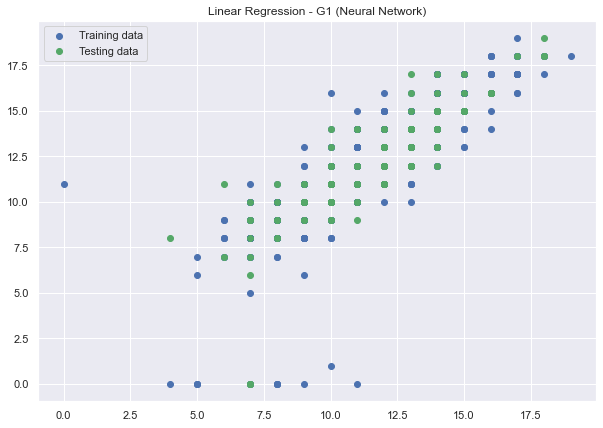

In [37]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train_G1, y_train_G1, c='b', label='Training data')

# Plot test data in green
plt.scatter(X_test_G1, y_test_G1, c='g', label='Testing data')

# Show the legend
plt.legend();

plt.title("Linear Regression - G1 (Neural Network)")

In [38]:
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit the model to the training data
history_G1 = model.fit(X_train_G1, y_train_G1, epochs=100, verbose=1) # verbose controls how much gets output

Epoch 1/100
17/17 [==============================] - 0s 864us/step - loss: 2.8329 - mae: 2.8329
Epoch 2/100
17/17 [==============================] - 0s 1ms/step - loss: 1.3581 - mae: 1.3581
Epoch 3/100
17/17 [==============================] - 0s 975us/step - loss: 1.2742 - mae: 1.2742
Epoch 4/100
17/17 [==============================] - 0s 940us/step - loss: 1.2598 - mae: 1.2598
Epoch 5/100
17/17 [==============================] - 0s 1ms/step - loss: 1.2470 - mae: 1.2470
Epoch 6/100
17/17 [==============================] - 0s 1ms/step - loss: 1.2498 - mae: 1.2498
Epoch 7/100
17/17 [==============================] - 0s 820us/step - loss: 1.2510 - mae: 1.2510
Epoch 8/100
17/17 [==============================] - 0s 888us/step - loss: 1.2369 - mae: 1.2369
Epoch 9/100
17/17 [==============================] - 0s 935us/step - loss: 1.2564 - mae: 1.2564
Epoch 10/100
17/17 [==============================] - 0s 907us/step - loss: 1.2524 - mae: 1.2524
Epoch 11/100
17/17 [=========================

17/17 [==============================] - 0s 841us/step - loss: 1.2002 - mae: 1.2002
Epoch 87/100
17/17 [==============================] - 0s 862us/step - loss: 1.2070 - mae: 1.2070
Epoch 88/100
17/17 [==============================] - 0s 910us/step - loss: 1.2233 - mae: 1.2233
Epoch 89/100
17/17 [==============================] - 0s 803us/step - loss: 1.2102 - mae: 1.2102
Epoch 90/100
17/17 [==============================] - 0s 783us/step - loss: 1.2368 - mae: 1.2368
Epoch 91/100
17/17 [==============================] - 0s 1ms/step - loss: 1.1980 - mae: 1.1980
Epoch 92/100
17/17 [==============================] - 0s 806us/step - loss: 1.1970 - mae: 1.1970
Epoch 93/100
17/17 [==============================] - 0s 964us/step - loss: 1.1964 - mae: 1.1964
Epoch 94/100
17/17 [==============================] - 0s 925us/step - loss: 1.1952 - mae: 1.1952
Epoch 95/100
17/17 [==============================] - 0s 819us/step - loss: 1.2045 - mae: 1.2045
Epoch 96/100
17/17 [=========================

### We check that there is a decreasing trend for the loss and mae function to ensure that the model is improving through the training of the model

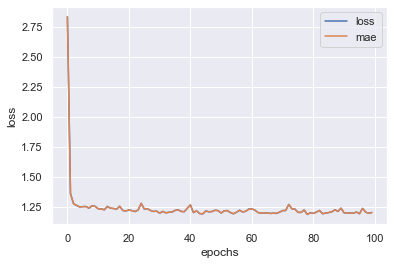

In [39]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_G1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

> Total params - total number of parameters in the model.

> Trainable parameters - these are the parameters (patterns) the model can update as it trains.

> Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               200       
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [41]:
y_test_predNN_G1 = model.predict(X_test_G1)

5/5 [==============================] - 0s 2ms/step


In [42]:
#defining functions to be used for NN evaluation

def plot_predictions(train_data=X_train_G1, 
                     train_labels=y_train_G1, 
                     test_data=X_test_G1, 
                     test_labels=y_test_G1, 
                     predictions=y_test_predNN_G1):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();
    
def mae(y_test_G1, y_test_pred_G1):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test_G1,
                                        y_test_pred_G1)
  
def mse(y_test_G1, y_test_pred_G1):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test_G1,
                                       y_test_pred_G1)

Text(0.5, 1.0, 'Linear Regression - G1 (Neural Network)')

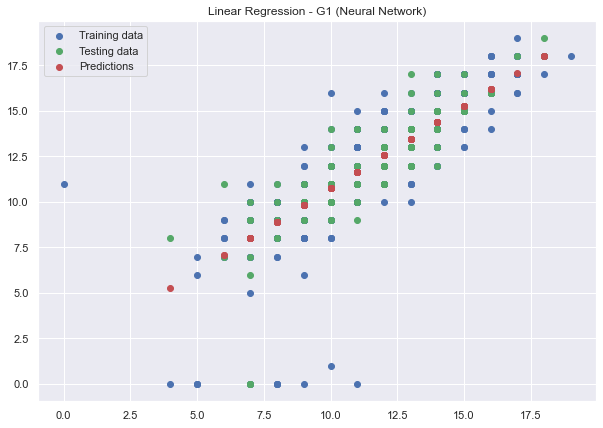

In [43]:
plot_predictions(train_data=X_train_G1,
                 train_labels=y_train_G1,
                 test_data=X_test_G1,
                 test_labels=y_test_G1,
                 predictions=y_test_predNN_G1)
plt.title("Linear Regression - G1 (Neural Network)")

In [44]:
# Evaluate the model on the test set

mae_G1 = mae(y_test_G1, y_test_predNN_G1.squeeze()).numpy()
mse_G1 = mse(y_test_G1, y_test_predNN_G1.squeeze()).numpy()
print("Mean Squared Error - MSE (Neural Network - Test) \t:", mse_G1)
print("Mean Absolute Error - MAE (Neural Network - Test) \t:", mae_G1)

Mean Squared Error - MSE (Neural Network - Test) 	: 2.8900163
Mean Absolute Error - MAE (Neural Network - Test) 	: 1.0813884


    Mean Squared Error - MSE (Linear Regression - Test) 	: 3.5113399670185923

# G2

In [59]:
y_G2 = studentData['G3']
X_G2= newStudentData[['G2']]

X_train_G2, X_test_G2, y_train_G2, y_test_G2 = train_test_split(X_G2, y_G2,test_size = 0.2)
print("Train Set :", X_train_G2.shape, y_train_G2.shape)
print("Test Set  :", X_test_G2.shape, y_test_G2.shape)

Train Set : (519, 1) (519,)
Test Set  : (130, 1) (130,)


Text(0.5, 1.0, 'Linear Regression - G2 (Neural Network)')

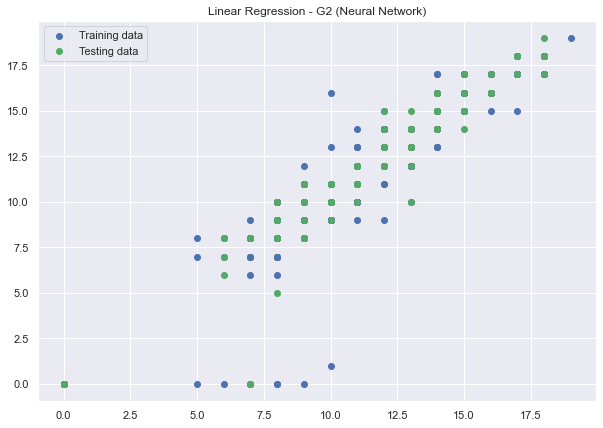

In [60]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train_G2, y_train_G2, c='b', label='Training data')

# Plot test data in green
plt.scatter(X_test_G2, y_test_G2, c='g', label='Testing data')

# Show the legend
plt.legend();

plt.title("Linear Regression - G2 (Neural Network)")

In [61]:
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit the model to the training data
history_G2 = model.fit(X_train_G2, y_train_G2, epochs=100, verbose=1) # verbose controls how much gets output

Epoch 1/100
17/17 [==============================] - 0s 912us/step - loss: 2.6020 - mae: 2.6020
Epoch 2/100
17/17 [==============================] - 0s 1ms/step - loss: 1.0012 - mae: 1.0012
Epoch 3/100
17/17 [==============================] - 0s 1ms/step - loss: 0.8606 - mae: 0.8606
Epoch 4/100
17/17 [==============================] - 0s 909us/step - loss: 0.8498 - mae: 0.8498
Epoch 5/100
17/17 [==============================] - 0s 874us/step - loss: 0.8456 - mae: 0.8456
Epoch 6/100
17/17 [==============================] - 0s 1ms/step - loss: 0.7813 - mae: 0.7813
Epoch 7/100
17/17 [==============================] - 0s 844us/step - loss: 0.7886 - mae: 0.7886
Epoch 8/100
17/17 [==============================] - 0s 925us/step - loss: 0.8118 - mae: 0.8118
Epoch 9/100
17/17 [==============================] - 0s 909us/step - loss: 0.7734 - mae: 0.7734
Epoch 10/100
17/17 [==============================] - 0s 921us/step - loss: 0.7772 - mae: 0.7772
Epoch 11/100
17/17 [=========================

17/17 [==============================] - 0s 1ms/step - loss: 0.7848 - mae: 0.7848
Epoch 87/100
17/17 [==============================] - 0s 896us/step - loss: 0.7723 - mae: 0.7723
Epoch 88/100
17/17 [==============================] - 0s 901us/step - loss: 0.8358 - mae: 0.8358
Epoch 89/100
17/17 [==============================] - 0s 747us/step - loss: 0.8814 - mae: 0.8814
Epoch 90/100
17/17 [==============================] - 0s 735us/step - loss: 0.7733 - mae: 0.7733
Epoch 91/100
17/17 [==============================] - 0s 729us/step - loss: 0.7708 - mae: 0.7708
Epoch 92/100
17/17 [==============================] - 0s 752us/step - loss: 0.7985 - mae: 0.7985
Epoch 93/100
17/17 [==============================] - 0s 768us/step - loss: 0.7822 - mae: 0.7822
Epoch 94/100
17/17 [==============================] - 0s 1ms/step - loss: 0.7790 - mae: 0.7790
Epoch 95/100
17/17 [==============================] - 0s 748us/step - loss: 0.7862 - mae: 0.7862
Epoch 96/100
17/17 [===========================

### We check that there is a decreasing trend for the loss and mae function to ensure that the model is improving through the training of the model

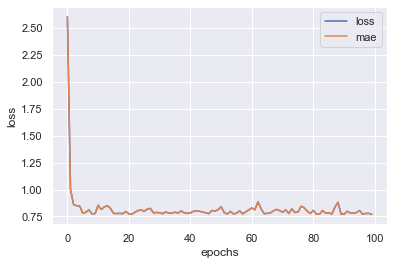

In [62]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_G2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [63]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 100)               200       
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


5/5 [==============================] - 0s 980us/step


Text(0.5, 1.0, 'Linear Regression - G2 (Neural Network)')

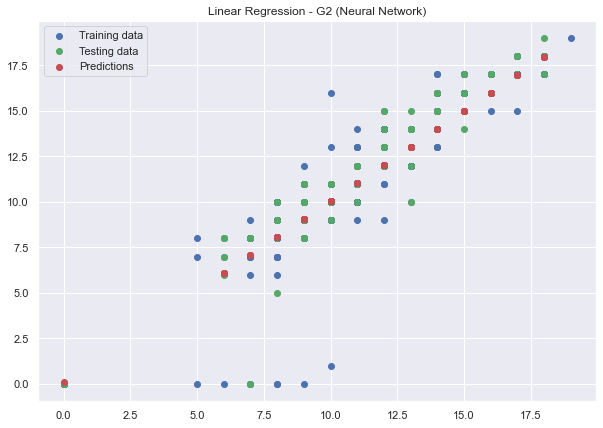

In [64]:
y_test_predNN_G2 = model.predict(X_test_G2)

plot_predictions(train_data=X_train_G2,
                 train_labels=y_train_G2,
                 test_data=X_test_G2,
                 test_labels=y_test_G2,
                 predictions=y_test_predNN_G2)
plt.title("Linear Regression - G2 (Neural Network)")

In [65]:
# Evaluate the model on the test set

mae_G2 = mae(y_test_G2, y_test_predNN_G2.squeeze()).numpy()
mse_G2 = mse(y_test_G2, y_test_predNN_G2.squeeze()).numpy()
print("Mean Squared Error - MSE (Neural Network - Test) \t:", mse_G2)
print("Mean Absolute Error - MAE (Neural Network - Test) \t:", mae_G2)

Mean Squared Error - MSE (Neural Network - Test) 	: 1.4348648
Mean Absolute Error - MAE (Neural Network - Test) 	: 0.7928468


    Mean Squared Error - MSE (Linear Regression - Test) 	: 1.9873237110193824

# Absences (K-Means Clustering Shortlisted Vairable)

> Now, we do the Neural Network learning on Absences. 

In [52]:
y_absences = studentData['G3']
X_absences= newStudentData[['absences']]

X_train_absences, X_test_absences, y_train_absences, y_test_absences = train_test_split(X_absences, y_absences,test_size = 0.2)
print("Train Set :", X_train_absences.shape, y_train_absences.shape)
print("Test Set  :", X_test_absences.shape, y_test_absences.shape)

Train Set : (519, 1) (519,)
Test Set  : (130, 1) (130,)


Text(0.5, 1.0, 'Linear Regression - Absences (Neural Network)')

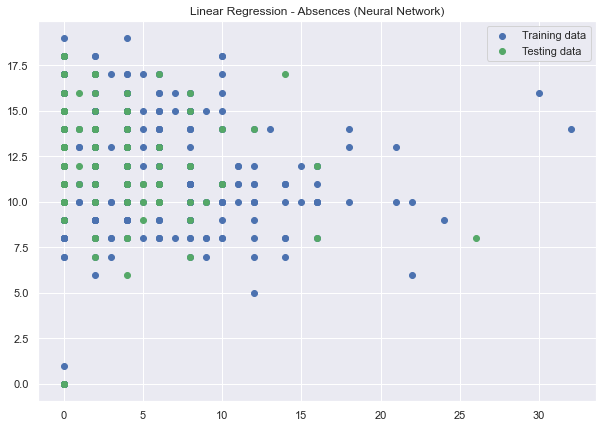

In [53]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train_absences, y_train_absences, c='b', label='Training data')

# Plot test data in green
plt.scatter(X_test_absences, y_test_absences, c='g', label='Testing data')

# Show the legend
plt.legend();

plt.title("Linear Regression - Absences (Neural Network)")

In [54]:
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit the model to the training data
history_absences = model.fit(X_train_absences, y_train_absences, epochs=100, verbose=1) # verbose controls how much gets output

Epoch 1/100
17/17 [==============================] - 0s 841us/step - loss: 9.1092 - mae: 9.1092
Epoch 2/100
17/17 [==============================] - 0s 969us/step - loss: 8.4697 - mae: 8.4697
Epoch 3/100
17/17 [==============================] - 0s 1ms/step - loss: 8.2497 - mae: 8.2497
Epoch 4/100
17/17 [==============================] - 0s 925us/step - loss: 7.9951 - mae: 7.9951
Epoch 5/100
17/17 [==============================] - 0s 916us/step - loss: 7.6989 - mae: 7.6989
Epoch 6/100
17/17 [==============================] - 0s 927us/step - loss: 7.3154 - mae: 7.3154
Epoch 7/100
17/17 [==============================] - 0s 927us/step - loss: 6.7918 - mae: 6.7918
Epoch 8/100
17/17 [==============================] - 0s 909us/step - loss: 6.0634 - mae: 6.0634
Epoch 9/100
17/17 [==============================] - 0s 924us/step - loss: 5.1607 - mae: 5.1607
Epoch 10/100
17/17 [==============================] - 0s 1ms/step - loss: 3.9500 - mae: 3.9500
Epoch 11/100
17/17 [=======================

17/17 [==============================] - 0s 907us/step - loss: 2.4185 - mae: 2.4185
Epoch 87/100
17/17 [==============================] - 0s 786us/step - loss: 2.3793 - mae: 2.3793
Epoch 88/100
17/17 [==============================] - 0s 820us/step - loss: 2.3708 - mae: 2.3708
Epoch 89/100
17/17 [==============================] - 0s 773us/step - loss: 2.3704 - mae: 2.3704
Epoch 90/100
17/17 [==============================] - 0s 781us/step - loss: 2.3912 - mae: 2.3912
Epoch 91/100
17/17 [==============================] - 0s 791us/step - loss: 2.3759 - mae: 2.3759
Epoch 92/100
17/17 [==============================] - 0s 709us/step - loss: 2.3780 - mae: 2.3780
Epoch 93/100
17/17 [==============================] - 0s 734us/step - loss: 2.3725 - mae: 2.3725
Epoch 94/100
17/17 [==============================] - 0s 862us/step - loss: 2.3641 - mae: 2.3641
Epoch 95/100
17/17 [==============================] - 0s 751us/step - loss: 2.3657 - mae: 2.3657
Epoch 96/100
17/17 [=======================

### We check that there is a decreasing trend for the loss and mae function to ensure that the model is improving through the training of the model

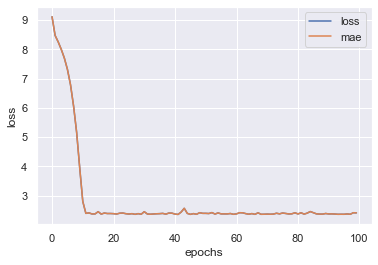

In [55]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_absences.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [56]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               200       
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


5/5 [==============================] - 0s 734us/step


Text(0.5, 1.0, 'Linear Regression - Absences (Neural Network)')

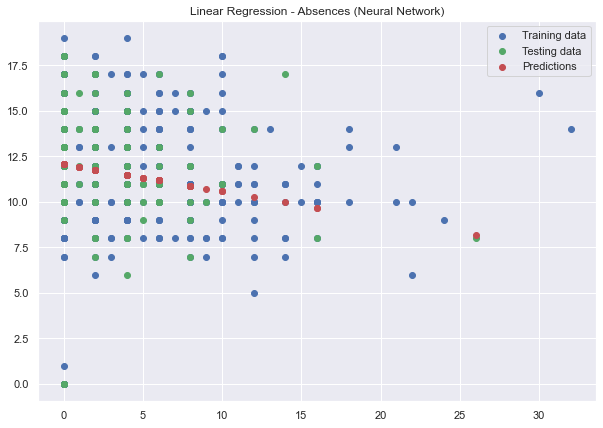

In [57]:
y_test_predNN_absences = model.predict(X_test_absences)

plot_predictions(train_data=X_train_absences,
                 train_labels=y_train_absences,
                 test_data=X_test_absences,
                 test_labels=y_test_absences,
                 predictions=y_test_predNN_absences)
plt.title("Linear Regression - Absences (Neural Network)")

In [58]:
# Evaluate the model on the test set

mae_absences = mae(y_test_absences, y_test_predNN_absences.squeeze()).numpy()
mse_absences = mse(y_test_absences, y_test_predNN_absences.squeeze()).numpy()
print("Mean Squared Error - MSE (Neural Network - Test) \t:", mse_absences)
print("Mean Absolute Error - MAE (Neural Network - Test) \t:", mae_absences)

Mean Squared Error - MSE (Neural Network - Test) 	: 10.295562
Mean Absolute Error - MAE (Neural Network - Test) 	: 2.350686


    Mean Squared Error - MSE (Linear Regression - Test): 11.286516530937327

# AGE (K-Means Clustering Shortlisted Variable)

> Now, we do the Neural Network learning on Absences. 

In [29]:
y_age = studentData['G3']
X_age = newStudentData[['age']]

X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_age,test_size = 0.2)
print("Train Set :", X_train_age.shape, y_train_age.shape)
print("Test Set  :", X_test_age.shape, y_test_age.shape)

Train Set : (519, 1) (519,)
Test Set  : (130, 1) (130,)


Text(0.5, 1.0, 'Linear Regression - Age (Neural Network)')

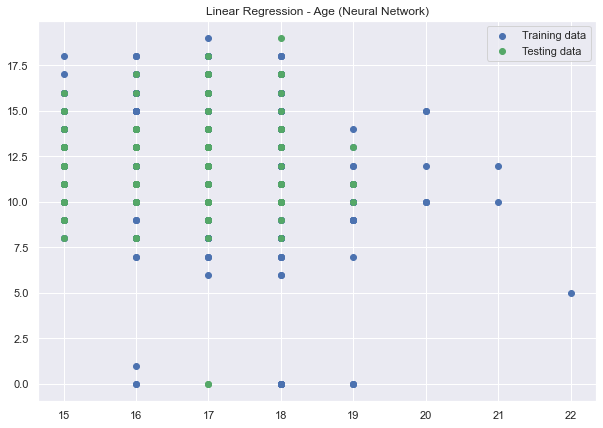

In [30]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train_age, y_train_age, c='b', label='Training data')

# Plot test data in green
plt.scatter(X_test_age, y_test_age, c='g', label='Testing data')

# Show the legend
plt.legend();

plt.title("Linear Regression - Age (Neural Network)")

In [31]:
tf.random.set_seed(42)


# Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit the model to the training data
history_age = model.fit(X_train_age, y_train_age, epochs=100, verbose=1) # verbose controls how much gets output

Epoch 1/100
17/17 [==============================] - 0s 833us/step - loss: 3.0017 - mae: 3.0017
Epoch 2/100
17/17 [==============================] - 0s 1ms/step - loss: 2.6877 - mae: 2.6877
Epoch 3/100
17/17 [==============================] - 0s 1ms/step - loss: 2.7131 - mae: 2.7131
Epoch 4/100
17/17 [==============================] - 0s 1ms/step - loss: 2.6913 - mae: 2.6913
Epoch 5/100
17/17 [==============================] - 0s 849us/step - loss: 2.6733 - mae: 2.6733
Epoch 6/100
17/17 [==============================] - 0s 948us/step - loss: 2.6805 - mae: 2.6805
Epoch 7/100
17/17 [==============================] - 0s 837us/step - loss: 2.6841 - mae: 2.6841
Epoch 8/100
17/17 [==============================] - 0s 724us/step - loss: 2.6849 - mae: 2.6849
Epoch 9/100
17/17 [==============================] - 0s 728us/step - loss: 2.6675 - mae: 2.6675
Epoch 10/100
17/17 [==============================] - 0s 776us/step - loss: 2.6644 - mae: 2.6644
Epoch 11/100
17/17 [=========================

17/17 [==============================] - 0s 757us/step - loss: 2.6008 - mae: 2.6008
Epoch 86/100
17/17 [==============================] - 0s 5ms/step - loss: 2.6402 - mae: 2.6402
Epoch 87/100
17/17 [==============================] - 0s 2ms/step - loss: 2.6198 - mae: 2.6198
Epoch 88/100
17/17 [==============================] - 0s 1ms/step - loss: 2.6438 - mae: 2.6438
Epoch 89/100
17/17 [==============================] - 0s 1ms/step - loss: 2.6161 - mae: 2.6161
Epoch 90/100
17/17 [==============================] - 0s 1ms/step - loss: 2.6169 - mae: 2.6169
Epoch 91/100
17/17 [==============================] - 0s 1ms/step - loss: 2.6080 - mae: 2.6080
Epoch 92/100
17/17 [==============================] - 0s 1ms/step - loss: 2.6391 - mae: 2.6391
Epoch 93/100
17/17 [==============================] - 0s 1ms/step - loss: 2.6689 - mae: 2.6689
Epoch 94/100
17/17 [==============================] - 0s 1ms/step - loss: 2.6546 - mae: 2.6546
Epoch 95/100
17/17 [==============================] - 0s 1ms/

### We check that there is a decreasing trend for the loss and mae function to ensure that the model is improving through the training of the model

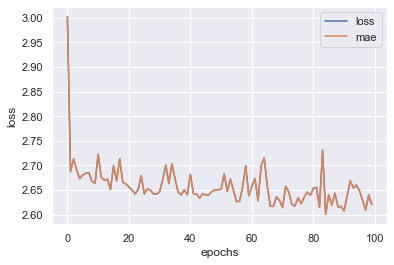

In [32]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_age.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               200       
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


5/5 [==============================] - 0s 753us/step


Text(0.5, 1.0, 'Linear Regression - Age (Neural Network)')

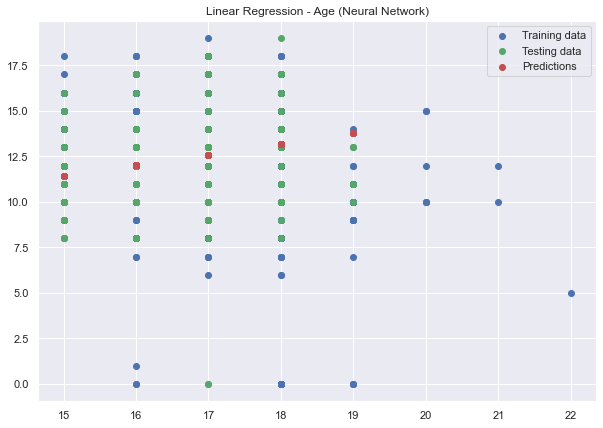

In [34]:
y_test_predNN_age = model.predict(X_test_age)

plot_predictions(train_data=X_train_age,
                 train_labels=y_train_age,
                 test_data=X_test_age,
                 test_labels=y_test_age,
                 predictions=y_test_predNN_age)

plt.title("Linear Regression - Age (Neural Network)")

In [35]:
# Evaluate the model on the test set

mae_age = mae(y_test_age, y_test_predNN_age.squeeze()).numpy()
mse_age = mse(y_test_age, y_test_predNN_age.squeeze()).numpy()
print("Mean Squared Error - MSE (Neural Network - Test) \t:", mse_age)
print("Mean Absolute Error - MAE (Neural Network - Test) \t:", mae_age)

Mean Squared Error - MSE (Neural Network - Test) 	: 8.50226
Mean Absolute Error - MAE (Neural Network - Test) 	: 2.2391493


    Mean Squared Error - MSE (Linear Regression - Test): 9.167635776700525

# Conclusion:

By looking at the MAE and MSE of each variable, G2 would be the best variable, followed by G1, age then absences, which is similar to the results from the single-variate linear regression model. 

In general, there is also an improvement to the MSE value from the neural network as compared to the linear regression model values. The percentage improvement are as follows:

* G1: 17.69%

* G2: 27.80%

* Age: 7.26% 

* Absences: 8.78%

### K-Means clustering variables evaluation:

* Comparing the shortlisted variables from K-means clustering (age & absences) to the other numerical variables, G1 & G2, it can be seen that the variables are not as important to predict G3 as compared to the other numerical variables. 

* However, the order of importance from K-means clustering for the shortlisted variables is the same as the results from the Neural Network model, with Age being more important than Absences in predicting G3.